In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/10-monkey-species/monkey_labels.txt
/kaggle/input/10-monkey-species/training/training/n9/n9133.jpg
/kaggle/input/10-monkey-species/training/training/n9/n9126.jpg
/kaggle/input/10-monkey-species/training/training/n9/n9029.jpg
/kaggle/input/10-monkey-species/training/training/n9/n9138.jpg
/kaggle/input/10-monkey-species/training/training/n9/n9064.jpg
/kaggle/input/10-monkey-species/training/training/n9/n9162.jpg
/kaggle/input/10-monkey-species/training/training/n9/n9123.jpg
/kaggle/input/10-monkey-species/training/training/n9/n9163.jpg
/kaggle/input/10-monkey-species/training/training/n9/n9118.jpg
/kaggle/input/10-monkey-species/training/training/n9/n9065.jpg
/kaggle/input/10-monkey-species/training/training/n9/n9119.jpg
/kaggle/input/10-monkey-species/training/training/n9/n9042.jpg
/kaggle/input/10-monkey-species/training/training/n9/n9130.jpg
/kaggle/input/10-monkey-species/training/training/n9/n9061.jpg
/kaggle/input/10-monkey-species/training/training/n9/n9135.jpg
/kagg

In [2]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import sys
import time
import tensorflow as tf
from tensorflow import keras

for module in mpl,sklearn,tf,keras:
    print(module.__name__,module.__version__)

matplotlib 3.0.3
sklearn 0.21.3
tensorflow 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf


In [3]:
print(os.listdir("../input/10-monkey-species/"))

train_dir = "/kaggle/input/10-monkey-species/training/training"
valid_dir = "/kaggle/input/10-monkey-species/validation/validation"
label_file = "/kaggle/input/10-monkey-species/monkey_labels.txt"

print(os.path.exists(train_dir))
print(os.path.exists(valid_dir))
print(os.path.exists(label_file))

print(os.listdir(train_dir))
print(os.listdir(valid_dir))

['training', 'monkey_labels.txt', 'validation']
True
True
True
['n9', 'n5', 'n7', 'n1', 'n0', 'n2', 'n3', 'n8', 'n4', 'n6']
['n9', 'n5', 'n7', 'n1', 'n0', 'n2', 'n3', 'n8', 'n4', 'n6']


In [4]:
labels = pd.read_csv(label_file,header = 0)
print(labels.head(10))

   Label     Latin Name              Common Name                     \
0  n0         alouatta_palliata\t    mantled_howler                   
1  n1        erythrocebus_patas\t    patas_monkey                     
2  n2        cacajao_calvus\t        bald_uakari                      
3  n3        macaca_fuscata\t        japanese_macaque                 
4  n4       cebuella_pygmea\t        pygmy_marmoset                   
5  n5       cebus_capucinus\t        white_headed_capuchin            
6  n6       mico_argentatus\t        silvery_marmoset                 
7  n7      saimiri_sciureus\t        common_squirrel_monkey           
8  n8       aotus_nigriceps\t        black_headed_night_monkey        
9  n9       trachypithecus_johnii    nilgiri_langur                   

    Train Images    Validation Images  
0             131                  26  
1             139                  28  
2             137                  27  
3             152                  30  
4             131 

In [5]:
height = 224
width = 224
channels = 3
batch_size = 16
num_classes = 10

train_datagen = keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = keras.applications.resnet50.preprocess_input,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest",
)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (height,width),
                                                   batch_size = batch_size,
                                                   seed = 7,
                                                   shuffle = True,
                                                   class_mode = "categorical")

valid_datagen = keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = keras.applications.resnet50.preprocess_input,
)

valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                   target_size = (height,width),
                                                   batch_size = batch_size,
                                                   seed = 7,
                                                   shuffle = False,
                                                   class_mode = "categorical")

train_num = train_generator.samples
valid_num = valid_generator.samples
print(train_num)
print(valid_num)
    

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.
1098
272


In [6]:
for i in range(2):
    x,y = train_generator.next()
    print(x.shape,y.shape)
    print(y)

(16, 224, 224, 3) (16, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
(16, 224, 224, 3) (16, 10)
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0

In [9]:
resnet50_finetune = keras.models.Sequential()
resnet50_finetune.add(keras.applications.ResNet50(include_top = False,
                                                  pooling = "avg",
                                                  weights = "imagenet"))
resnet50_finetune.add(keras.layers.Dense(num_classes,activation = "softmax"))
resnet50_finetune.layers[0].trainable = False

resnet50_finetune.compile(loss = "categorical_crossentropy",
                          optimizer = "sgd",
                          metrics = ["accuracy"])

resnet50_finetune.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 10)                20490     
Total params: 23,608,202
Trainable params: 20,490
Non-trainable params: 23,587,712
_________________________________________________________________


In [10]:
epochs = 20
history = resnet50_finetune.fit_generator(train_generator,
                                          steps_per_epoch = train_num // batch_size,
                                          epochs = epochs,
                                          validation_data = valid_generator,
                                          validation_steps = valid_num // batch_size)

Train for 68 steps, validate for 17 steps
Epoch 1/20
68/68 [==============================] - 160s 2s/step - loss: 1.3530 - accuracy: 0.5767 - val_loss: 0.4826 - val_accuracy: 0.8824
Epoch 2/20
68/68 [==============================] - 154s 2s/step - loss: 0.5414 - accuracy: 0.8872 - val_loss: 0.3426 - val_accuracy: 0.8934
Epoch 3/20
68/68 [==============================] - 159s 2s/step - loss: 0.3741 - accuracy: 0.9261 - val_loss: 0.3168 - val_accuracy: 0.9081
Epoch 4/20
68/68 [==============================] - 159s 2s/step - loss: 0.3120 - accuracy: 0.9325 - val_loss: 0.2282 - val_accuracy: 0.9265
Epoch 5/20
68/68 [==============================] - 156s 2s/step - loss: 0.2476 - accuracy: 0.9492 - val_loss: 0.2006 - val_accuracy: 0.9449
Epoch 6/20
68/68 [==============================] - 158s 2s/step - loss: 0.2205 - accuracy: 0.9556 - val_loss: 0.2142 - val_accuracy: 0.9338
Epoch 7/20
68/68 [==============================] - 155s 2s/step - loss: 0.2024 - accuracy: 0.9593 - val_loss: 0

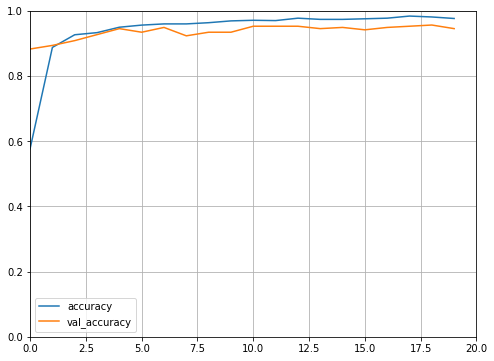

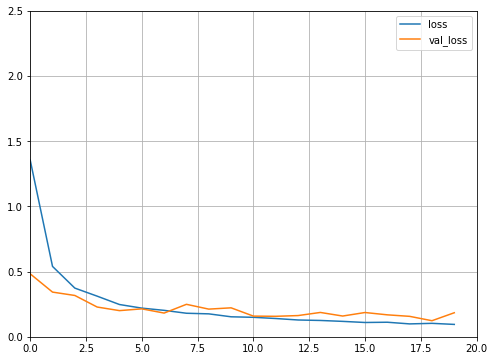

In [11]:
def plot_learning_curve(history,label,epochs,min_value,max_value):
    data = {}
    data[label] = history.history[label]
    data["val_" + label] = history.history["val_" + label]
    pd.DataFrame(data).plot(figsize = (8,6))
    plt.grid(True)
    plt.axis([0,epochs,min_value,max_value])
    plt.show()
    
plot_learning_curve(history,"accuracy",epochs,0.,1.)
plot_learning_curve(history,"loss",epochs,0.,2.5)

In [12]:
print(history.history)

{'loss': [1.3545867709267383, 0.5395210529651747, 0.3732386920015825, 0.31151897348670116, 0.24744863298595943, 0.21980328739460647, 0.20276699458935785, 0.18054594826676268, 0.17586190133680918, 0.1533539058044966, 0.14935847006862132, 0.1401901891293235, 0.12884301805865303, 0.12525179571783696, 0.11823406453328741, 0.10970760023224817, 0.11165147777405772, 0.09889065386131819, 0.10318566902838441, 0.0949767232905254], 'accuracy': [0.5767098, 0.88724583, 0.9260628, 0.93253237, 0.9491682, 0.9556377, 0.95933455, 0.95933455, 0.9630314, 0.9685767, 0.9704251, 0.9695009, 0.9768946, 0.97319776, 0.97319776, 0.9750462, 0.9768946, 0.98336416, 0.9805915, 0.97597045], 'val_loss': [0.4826327912947711, 0.3425949375857325, 0.31680161944207025, 0.22815430657390287, 0.2006464277887169, 0.21418165273087866, 0.18193417298607528, 0.24896378574125907, 0.21219437904245056, 0.22208299055722924, 0.15858123184400885, 0.15710134485818664, 0.16274274590507368, 0.1866699238307774, 0.1591458689654246, 0.18611990

In [13]:
resnet50 = keras.applications.ResNet50(include_top = False,
                                       pooling = "avg",
                                       weights = "imagenet")

resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
for layer in resnet50.layers[0:-5]:
    layer.trainable = False
    
resnet50_new = keras.models.Sequential([
    resnet50,
    keras.layers.Dense(num_classes,activation = "softmax"),
])

resnet50_new.compile(loss = "categorical_crossentropy",
                          optimizer = "sgd",
                          metrics = ["accuracy"])

resnet50_new.summary()